# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [4]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('/Users/jennawhite/Documents/DS-SEA-4/data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [5]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

IOError: [Errno 2] No such file or directory: '../data/yelp.json'

In [ ]:
# show the first review


In [ ]:
# convert the list of dictionaries to a DataFrame


In [ ]:
# add DataFrame columns for cool, useful, and funny


In [ ]:
# drop the votes column and then display the head


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [21]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
yelp.groupby(['stars']).mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


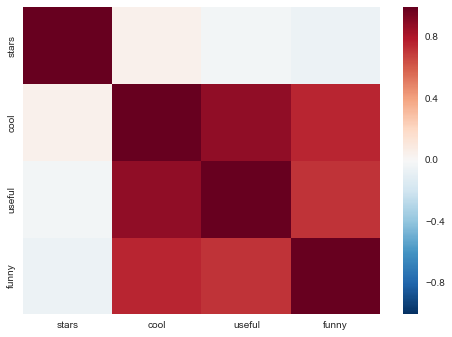

In [6]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

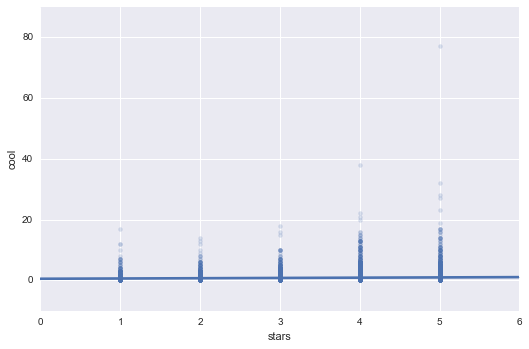

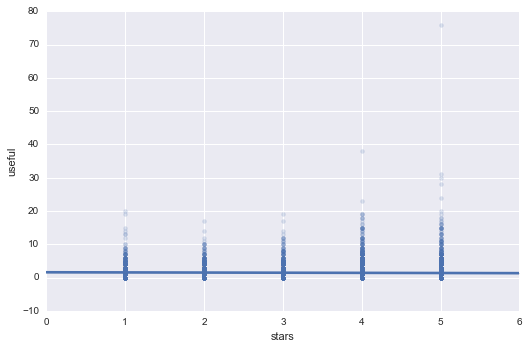

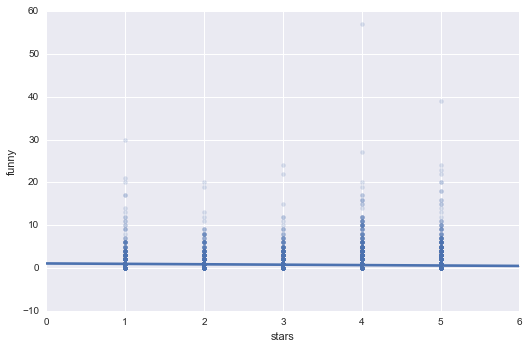

In [7]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='stars', y='cool', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='stars', y='useful', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='stars', y='funny', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [8]:
feature_cols=['cool','useful','funny']
x = yelp[feature_cols]
y = yelp.stars
x.shape

(10000, 3)

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)
print linreg.intercept_



# 1) an increase in stars is associated with an increase in 'cool' votes: 
# this makes sense as most low-star reviews would not be highlighting something they found had high social currency (ie: something cool)
# 2) an increase in stars is associated with a decrease in 'useful' votes:
# Though this seems to be a tag that could reflect both positive and negative sentiments, maybe yelp users skew towards
# 'useful' if it is showing what to avoid?

zip(feature_cols,linreg.coef_)

3.83989479278


[('cool', 0.27435946858853061),
 ('useful', -0.14745239099401478),
 ('funny', -0.13567449053706179)]

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [13]:
# define a function that accepts a list of features and returns testing RMSE
import pandas as pd
yelp = pd.read_csv('/Users/jennawhite/Documents/DS-SEA-4/data/yelp.csv')

feature_cols=['cool','useful','funny']
def train_test_rmse(feature_cols):
    x=yelp[feature_cols]
    y=yelp.stars
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 123)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [14]:
# calculate RMSE with all three features
train_test_rmse(feature_cols)

1.1733686274194506

## Task 6

Try removing some of the features and see if the RMSE improves.

In [15]:
print 'This is the original: ' 
print train_test_rmse(feature_cols)
print 'These are the variants: '
print train_test_rmse(['cool'])
print train_test_rmse(['cool', 'useful'])
print train_test_rmse(['useful','funny'])
print train_test_rmse(['funny','cool'])

This is the original: 
1.17336862742
These are the variants: 
1.20049049928
1.18537944234
1.20070113589
1.1851949299


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [ ]:
# new feature: 

In [ ]:
# new features: 


In [ ]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.